In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from functions import model as m
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
white = pd.read_csv('wines/WineQuality-WhiteWine.csv')
red = pd.read_csv('wines/WineQuality-WhiteWine.csv')

In [4]:
white['white'] = 1
white['red'] = 0
red['white'] = 0
red['red'] = 1

In [5]:
df = pd.concat([white, red], ignore_index = True)

In [6]:
df = df.loc[df.quality > 4]

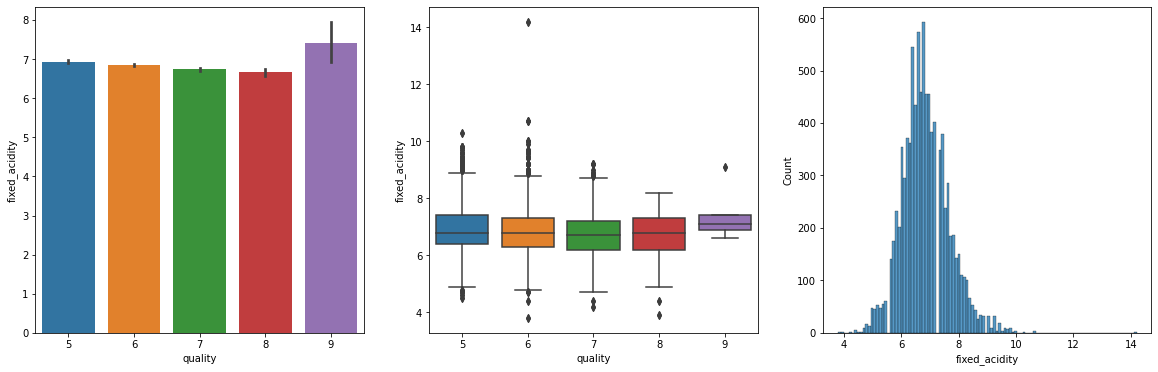

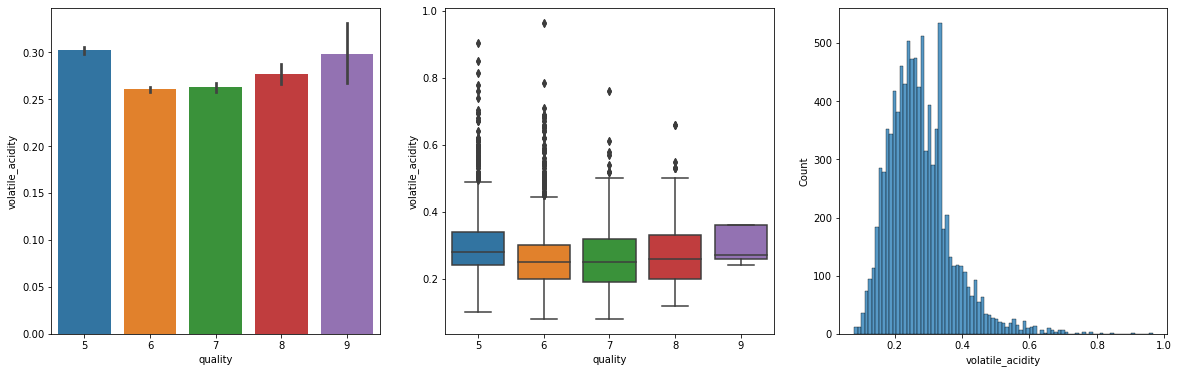

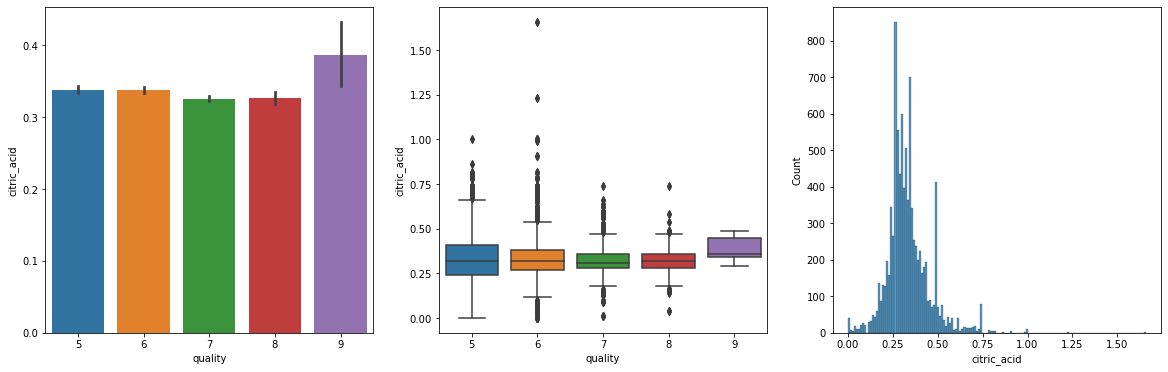

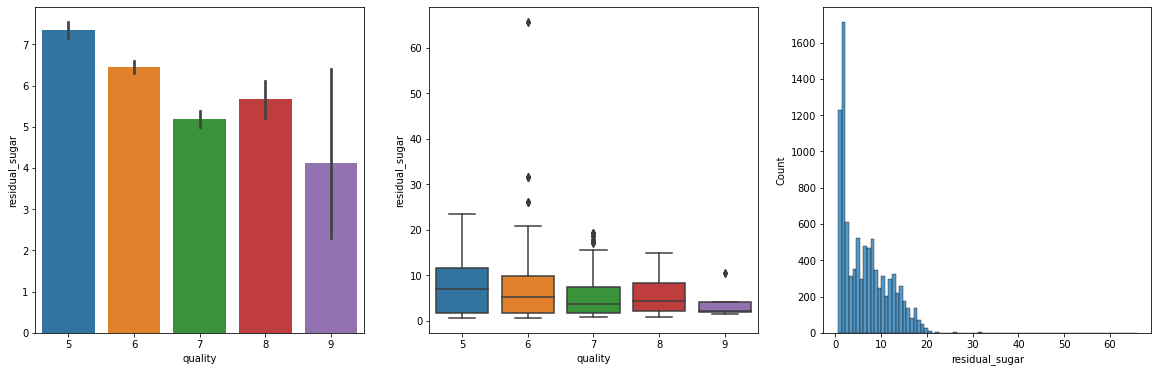

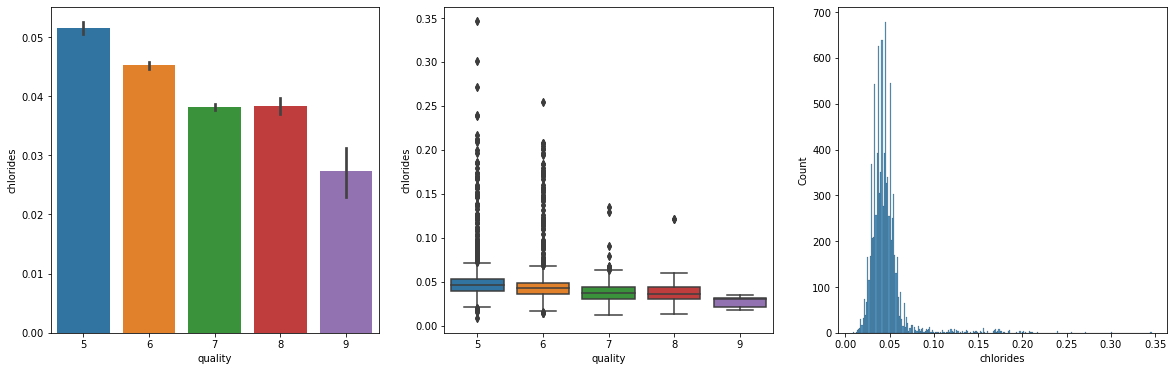

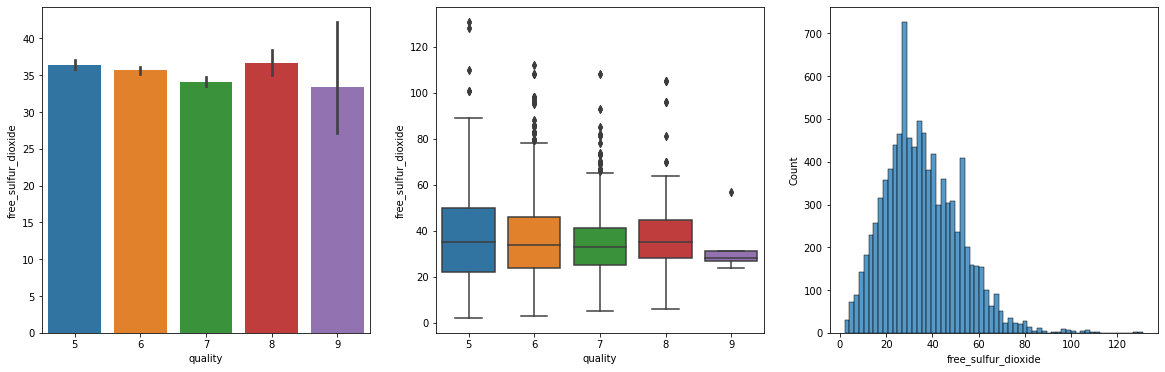

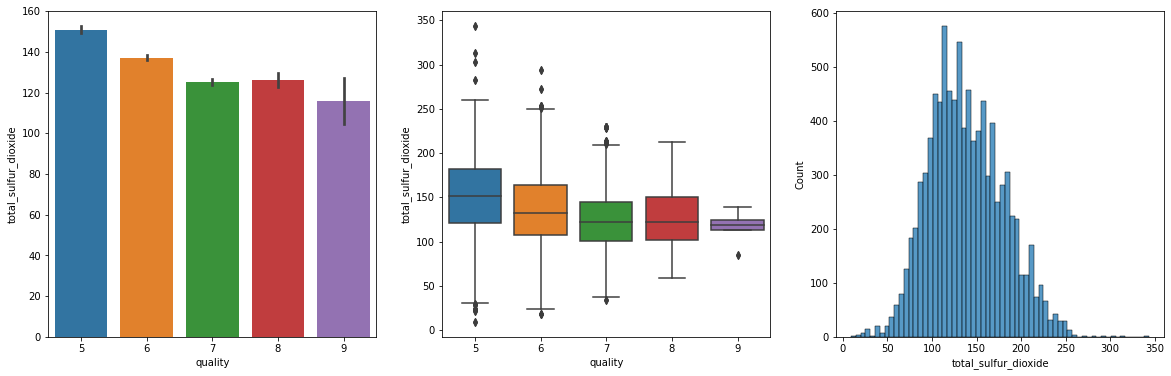

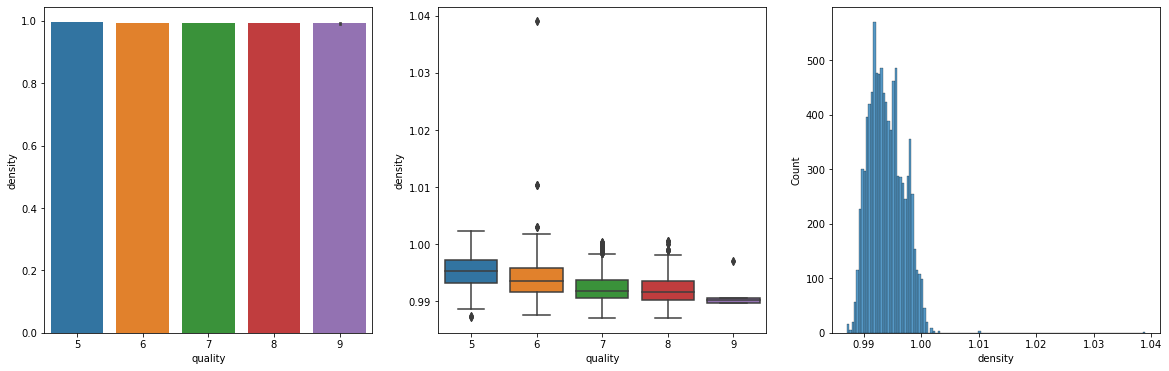

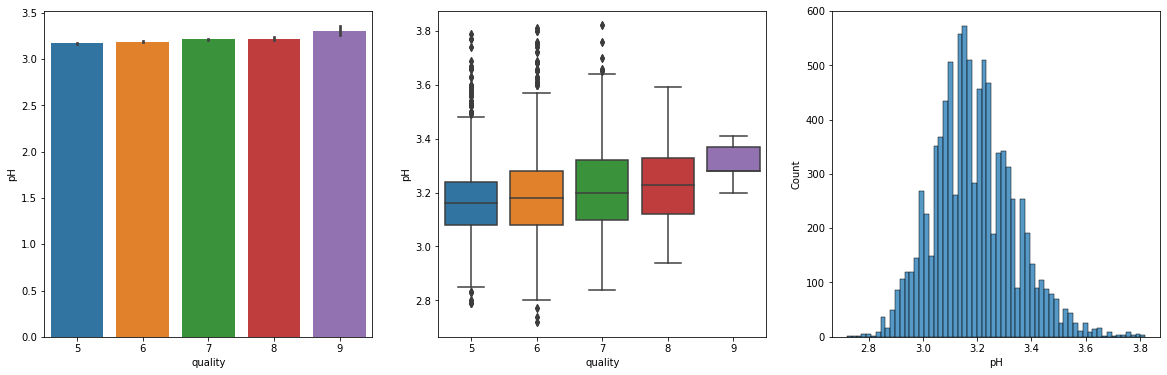

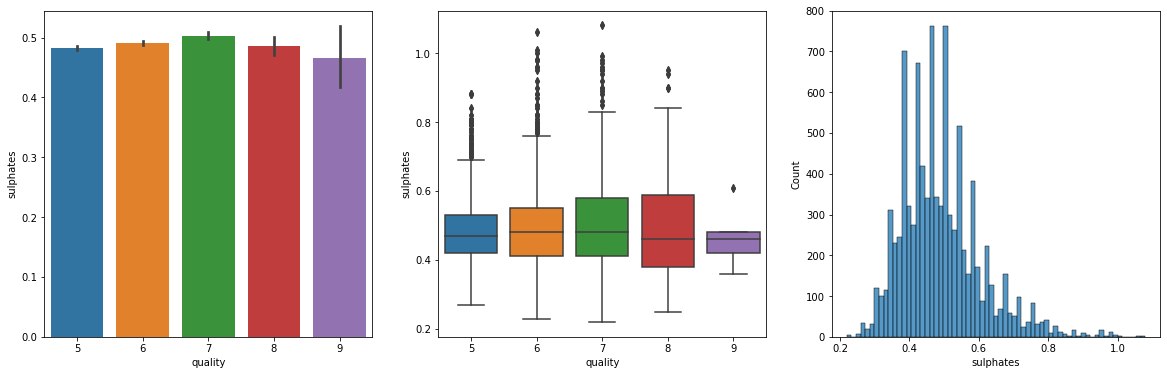

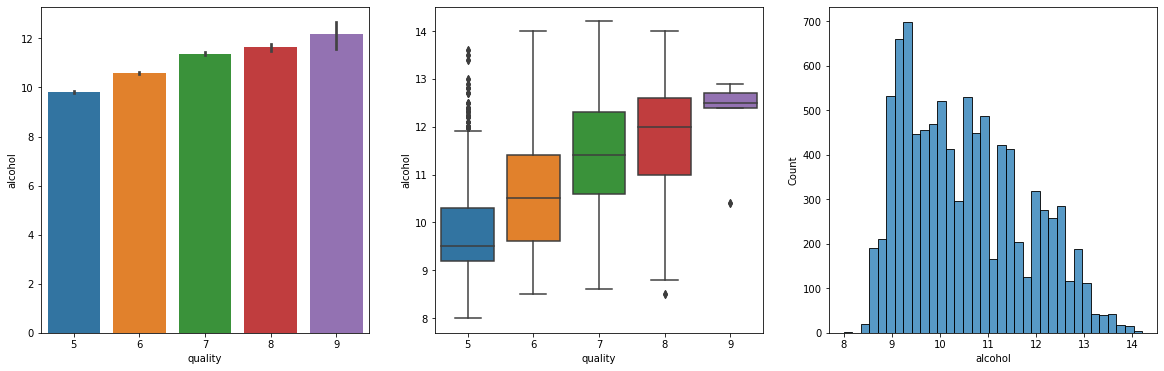

In [7]:
for column in df.iloc[:, :-3]:
    fig, ax = plt.subplots(1,3, figsize=(20, 6))
    sns.barplot(data=df, x='quality', y=column, ax=ax[0])
    sns.boxplot(data=df, x='quality', y=column, ax=ax[1])
    sns.histplot(data=df, x=column, ax=ax[2])
    plt.show()

In [8]:
y = df[['quality']]
x = df.drop(['quality'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

In [9]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.4668314979244866
Test Mean Square Error: 0.4785508458893835
Train Root Mean Square Error: 0.683250684540079
Test Root Mean Square Error: 0.6917736955749211


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     240.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:49:28   Log-Likelihood:                -7831.0
No. Observations:                7544   AIC:                         1.569e+04
Df Residuals:                    7531   BIC:                         1.578e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               89.3996     10.040      8.904      0.000      69.718     109.082
fixed_acidity            0.0887      0.016      5.575      0.000       0.058       0.120
volatile_acidity        -1.4142      0.089    -15.897      0.000      -1.589      -1.240
citric_acid             -0.0308      0.071     -0.437      0.662      -0.169       0.108
residual_sugar           0.0673      0.006     11.355      0.000       0.056       0.079
chlorides               -0.3908      0.407     -0.960      0.337      -1.188       0.407
free_sulfur_dioxide      0.0036      0.001      5.504      0.000       0.002       0.005
total_sulfur_dioxide    -0.0007      0.000     -2.523      0.012      -0.001      -0.000
density               -133.9627     15.270     -8.773      0.000    -163.896    -104.029
pH                       0.6841      0.079      8.607      0.000       0.528       0.840
sulphates                0.5356      0.074      7.236      0.000       0.390       0.681
alcohol                  0.1817      0.019      9.504      0.000       0.144       0.219
white                   44.7057      5.020      8.905      0.000      34.865      54.547
red                     44.6940      5.020      8.903      0.000      34.853      54.535
==============================================================================
Omnibus:                      400.483   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.874
Skew:                           0.573   Prob(JB):                    3.42e-103
Kurtosis:                       3.434   Cond. No.                     2.30e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Iteration 1

The goal of iteration 1 is to improve the insignificant p-values from our first model--citric acid and chlorides.

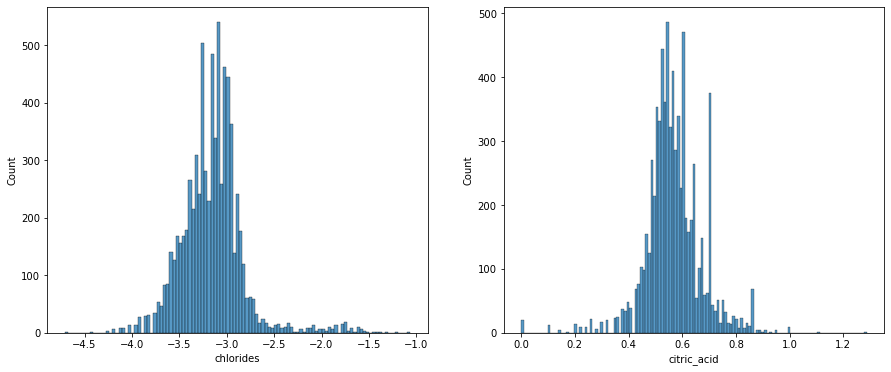

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.histplot(data=x_train, x='chlorides', ax=ax[0])
sns.histplot(data=x_train, x='citric_acid', ax=ax[1]);

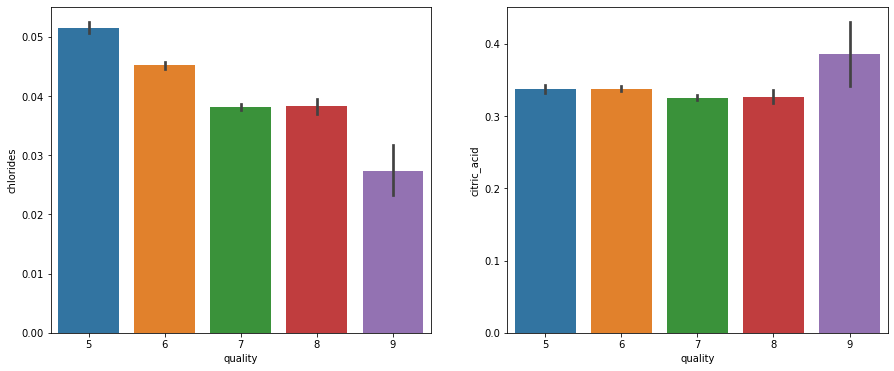

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.barplot(data=df, x='quality', y='chlorides', ax=ax[0])
sns.barplot(data=df, x='quality', y='citric_acid', ax=ax[1]);

Chlorides seems to have a fairly linear relationship with quality, but the distribution is slightly skewed, so we will use a log transformation to help normalize the distribution.
Citric acid has a more normal distribution and a less linear relationship to quality. It's a bit hard to tell, but the relationship sort of resembles a parabola, so we will try taking the square root of that column.

In [12]:
x_train['chlorides'] = x_train['chlorides'].map(lambda x: np.log(x))
x_train['citric_acid'] = x_train['citric_acid'].map(lambda x: np.sqrt(x))

In [15]:
x_test['chlorides'] = x_test['chlorides'].map(lambda x: np.log(x))
x_test['citric_acid'] = x_test['citric_acid'].map(lambda x: np.sqrt(x))

In [16]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.46650927276798876
Test Mean Square Error: 0.4782594812367521
Train Root Mean Square Error: 0.6830148408109363
Test Root Mean Square Error: 0.6915630710475742


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     241.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:50:27   Log-Likelihood:                -7828.4
No. Observations:                7544   AIC:                         1.568e+04
Df Residuals:                    7531   BIC:                         1.577e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               86.9563     10.101      8.609      0.000      67.156     106.756
fixed_acidity            0.0825      0.016      5.174      0.000       0.051       0.114
volatile_acidity        -1.3901      0.090    -15.495      0.000      -1.566      -1.214
citric_acid              0.0677      0.082      0.826      0.409      -0.093       0.229
residual_sugar           0.0656      0.006     11.042      0.000       0.054       0.077
chlorides               -0.0699      0.029     -2.446      0.014      -0.126      -0.014
free_sulfur_dioxide      0.0035      0.001      5.485      0.000       0.002       0.005
total_sulfur_dioxide    -0.0007      0.000     -2.482      0.013      -0.001      -0.000
density               -130.4516     15.342     -8.503      0.000    -160.526    -100.377
pH                       0.6750      0.079      8.516      0.000       0.520       0.830
sulphates                0.5288      0.074      7.153      0.000       0.384       0.674
alcohol                  0.1784      0.019      9.329      0.000       0.141       0.216
white                   43.4840      5.050      8.610      0.000      33.584      53.384
red                     43.4723      5.050      8.608      0.000      33.572      53.373
==============================================================================
Omnibus:                      404.029   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.069
Skew:                           0.575   Prob(JB):                    2.55e-104
Kurtosis:                       3.442   Cond. No.                     1.00e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.7e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Iteration 2

We have improved the p value for chlorides to an acceptable level, but citric acid remains insignificant, so we will drop that value. In this iteration we will check for collinearity issues.

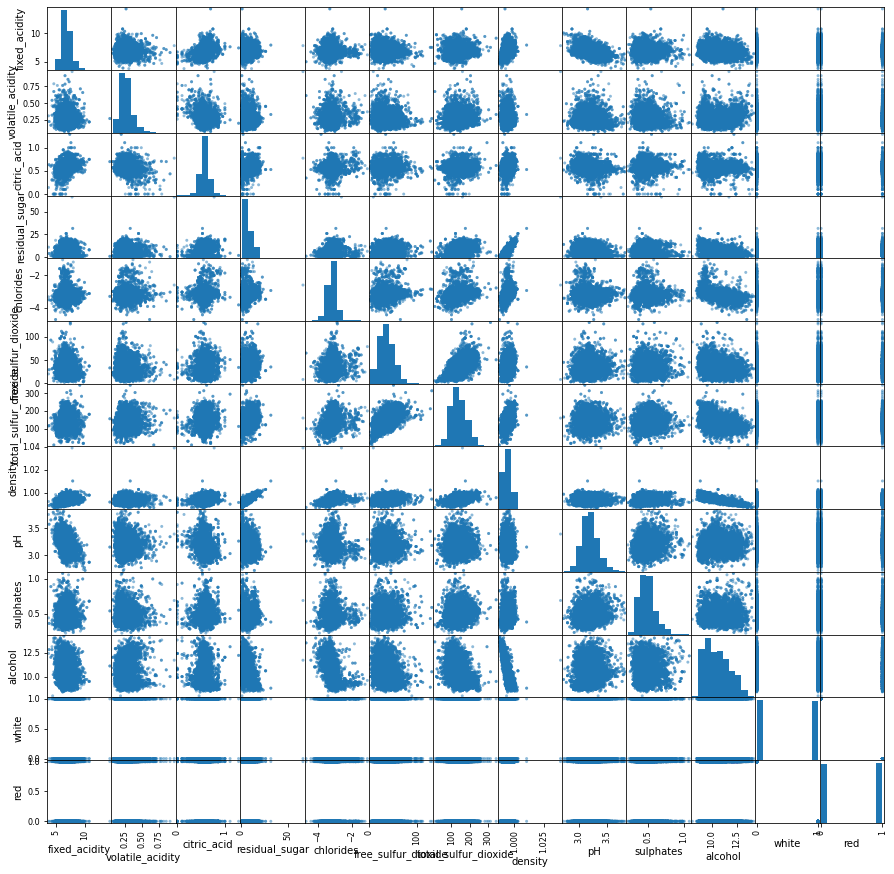

In [17]:
pd.plotting.scatter_matrix(x_train, figsize  = [15, 15]);

In [18]:
abs(x_train.corr()) >= 0.75

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,white,red
fixed_acidity,True,False,False,False,False,False,False,False,False,False,False,False,False
volatile_acidity,False,True,False,False,False,False,False,False,False,False,False,False,False
citric_acid,False,False,True,False,False,False,False,False,False,False,False,False,False
residual_sugar,False,False,False,True,False,False,False,True,False,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False,False
free_sulfur_dioxide,False,False,False,False,False,True,False,False,False,False,False,False,False
total_sulfur_dioxide,False,False,False,False,False,False,True,False,False,False,False,False,False
density,False,False,False,True,False,False,False,True,False,False,True,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False,False


The plot shows that density has a high correlation with both alcohol and residual sugars, so we will drop density as well.

In [21]:
x_train.drop(['density', 'citric_acid'], axis=1, inplace=True)
x_test.drop(['density', 'citric_acid'], axis=1, inplace=True)

In [22]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.47099136004836756
Test Mean Square Error: 0.47955371253339374
Train Root Mean Square Error: 0.6862881028025821
Test Root Mean Square Error: 0.6924981678917236


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     280.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:07:33   Log-Likelihood:                -7864.5
No. Observations:                7544   AIC:                         1.575e+04
Df Residuals:                    7533   BIC:                         1.583e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0892      0.168      6.470      0.000       0.759       1.419
fixed_acidity           -0.0148      0.011     -1.385      0.166      -0.036       0.006
volatile_acidity        -1.4502      0.088    -16.476      0.000      -1.623      -1.278
residual_sugar           0.0177      0.002      9.424      0.000       0.014       0.021
chlorides               -0.1192      0.028     -4.252      0.000      -0.174      -0.064
free_sulfur_dioxide      0.0044      0.001      6.880      0.000       0.003       0.006
total_sulfur_dioxide    -0.0012      0.000     -4.412      0.000      -0.002      -0.001
pH                       0.2376      0.061      3.922      0.000       0.119       0.356
sulphates                0.3568      0.071      5.006      0.000       0.217       0.496
alcohol                  0.3233      0.009     37.047      0.000       0.306       0.340
white                    0.5513      0.085      6.520      0.000       0.386       0.717
red                      0.5380      0.085      6.364      0.000       0.372       0.704
==============================================================================
Omnibus:                      400.154   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.868
Skew:                           0.572   Prob(JB):                    3.43e-103
Kurtosis:                       3.440   Cond. No.                     1.66e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""